# COVID Data Analysis

This project aims to leverage the power of Python to analyze COVID-19 sample dataset from kaggle and gain insights into the patterns, trends, and key factors associated with the virus's spread. We will focus on Python's data analysis libraries, such as Pandas, NumPy, and Matplotlib, to preprocess, analyze, and visualize COVID-19 data. 

By utilizing two datasets including summary and daily datasets, we are exploring various aspects such as infection rates, mortality rates, active cases to solve the following problems in different continents.

1. What is the total cases, deaths and recovered per continent?
2. Which 5 countries have the maximum death rate and recovery rate from the total confirmed cases based on their population?
3. Which 20 countries have the highest new tests with regards to their population?

We are starting with importing required libraries and packages.

In [18]:
import pandas
import matplotlib
import seaborn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import string
import io
import chardet

Dataset information

In [ ]:
#loading datasets, df_sumamry for summary dataset and df_daily includes daily updates of covid dataset.
df_summary = pd.read_csv(("/Users/binitashrestha/Documents/coviddata_folder/worldometer_coronavirus_summary_data.csv"))
df_daily = pd.read_csv(("/Users/binitashrestha/Documents/coviddata_folder/worldometer_coronavirus_daily_data.csv"))
print(df_summary)

                       country          continent  total_confirmed  \
0                  Afghanistan               Asia           179267   
1                      Albania             Europe           275574   
2                      Algeria             Africa           265816   
3                      Andorra             Europe            42156   
4                       Angola             Africa            99194   
..                         ...                ...              ...   
221  Wallis And Futuna Islands  Australia/Oceania              454   
222             Western Sahara             Africa               10   
223                      Yemen               Asia            11819   
224                     Zambia             Africa           320591   
225                   Zimbabwe             Africa           249206   

     total_deaths  total_recovered  active_cases  serious_or_critical  \
0          7690.0         162202.0        9375.0               1124.0   
1          34

In [ ]:
df_summary.head(2)

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,179267,7690.0,162202.0,9375.0,1124.0,4420,190.0,951337.0,23455.0,40560636
1,Albania,Europe,275574,3497.0,271826.0,251.0,2.0,95954,1218.0,1817530.0,632857.0,2871945


In [ ]:
df_summary.shape

(226, 12)

In [ ]:
df_daily.head(2)

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0.0,NaN,0.0,0.0,NaN
1,2020-2-16,Afghanistan,0.0,NaN,0.0,0.0,NaN


In [ ]:
df_daily.shape

(184787, 7)

In [ ]:
df_summary.columns

Index(['country', 'continent', 'total_confirmed', 'total_deaths',
       'total_recovered', 'active_cases', 'serious_or_critical',
       'total_cases_per_1m_population', 'total_deaths_per_1m_population',
       'total_tests', 'total_tests_per_1m_population', 'population'],
      dtype='object')

In [ ]:
df_daily.columns

Index(['date', 'country', 'cumulative_total_cases', 'daily_new_cases',
       'active_cases', 'cumulative_total_deaths', 'daily_new_deaths'],
      dtype='object')

In [ ]:
 #Summary statistics for numerical features
df_summary.describe()

,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
count,2.260000e+02,2.180000e+02,2.040000e+02,2.040000e+02,145.000000,226.000000,218.000000,2.120000e+02,2.120000e+02,2.260000e+02
mean,2.305651e+06,2.884442e+04,2.256851e+06,6.861029e+04,269.482759,148156.809735,1157.550459,2.987445e+07,1.944650e+06,3.495521e+07
std,7.575510e+06,9.971254e+04,7.613357e+06,2.350430e+05,883.174727,155202.909225,1212.833590,1.079635e+08,3.318400e+06,1.390338e+08
min,2.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000,16.000000,2.000000,5.117000e+03,5.093000e+03,8.050000e+02
25%,2.412600e+04,2.370000e+02,1.619300e+04,2.397500e+02,5.000000,11748.250000,172.500000,3.472968e+05,1.667260e+05,5.605125e+05
50%,1.793750e+05,2.251500e+03,1.372740e+05,1.634000e+03,17.000000,98271.500000,768.000000,2.238918e+06,7.753355e+05,5.800570e+06
75%,1.090902e+06,1.400650e+04,1.006245e+06,1.929675e+04,139.000000,255632.750000,1850.000000,1.233862e+07,2.267408e+06,2.187284e+07
max,8.420947e+07,1.026646e+06,8.124426e+07,1.938567e+06,8318.000000,704302.000000,6297.000000,1.016883e+09,2.184247e+07,1.439324e+09


In [ ]:
df_daily.describe()

,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
count,1.847870e+05,174329.000000,1.667470e+05,1.782270e+05,157850.000000
mean,7.251089e+05,2987.633285,6.239283e+04,1.388600e+04,39.831834
std,3.681471e+06,17803.232663,3.955641e+05,6.049521e+04,181.102770
min,0.000000e+00,-322.000000,-1.432100e+04,0.000000e+00,-39.000000
25%,1.099000e+03,0.000000,6.000000e+01,2.400000e+01,0.000000
50%,1.775600e+04,58.000000,1.386000e+03,3.040000e+02,1.000000
75%,2.238085e+05,728.000000,1.462050e+04,4.111000e+03,12.000000
max,8.420947e+07,909610.000000,1.793543e+07,1.026646e+06,5093.000000


Data Preprocessing
We will be initially preparing the raw data for analysis by transforming, cleaning, and organizing it to ensure its quality, consistency, and suitability for analysis. We are checking missing values, type converting datatypes or shortly make it ready for Exploratory data analysis.

In [ ]:
#checking for null values
df_summary.isna().sum()

country                            0
continent                          0
total_confirmed                    0
total_deaths                       8
total_recovered                   22
active_cases                      22
serious_or_critical               81
total_cases_per_1m_population      0
total_deaths_per_1m_population     8
total_tests                       14
total_tests_per_1m_population     14
population                         0
dtype: int64

In [ ]:
df_daily.isna().sum()

date                           0
country                        0
cumulative_total_cases         0
daily_new_cases            10458
active_cases               18040
cumulative_total_deaths     6560
daily_new_deaths           26937
dtype: int64

In [ ]:
df_summary.fillna(value = 0, inplace = True)  #Filling the null values with 0
df_daily.fillna(value = 0, inplace = True)  #Filling the null values with 0

In [ ]:
#checking for datatypes and converting them to integers.
df_summary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   country                         226 non-null    object 
 1   continent                       226 non-null    object 
 2   total_confirmed                 226 non-null    int64  
 3   total_deaths                    226 non-null    float64
 4   total_recovered                 226 non-null    float64
 5   active_cases                    226 non-null    float64
 6   serious_or_critical             226 non-null    float64
 7   total_cases_per_1m_population   226 non-null    int64  
 8   total_deaths_per_1m_population  226 non-null    float64
 9   total_tests                     226 non-null    float64
 10  total_tests_per_1m_population   226 non-null    float64
 11  population                      226 non-null    int64  
dtypes: float64(7), int64(3), object(2)
m

In [ ]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184787 entries, 0 to 184786
Data columns (total 7 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   date                     184787 non-null  object 
 1   country                  184787 non-null  object 
 2   cumulative_total_cases   184787 non-null  float64
 3   daily_new_cases          184787 non-null  float64
 4   active_cases             184787 non-null  float64
 5   cumulative_total_deaths  184787 non-null  float64
 6   daily_new_deaths         184787 non-null  float64
dtypes: float64(5), object(2)
memory usage: 9.9+ MB


In [ ]:
df_summary["total_deaths"] = df_summary["total_deaths"].astype("int64")
df_summary["total_recovered"] = df_summary["total_recovered"].astype("int64")
df_summary["active_cases"] = df_summary["active_cases"].astype("int64")
df_summary["serious_or_critical"] = df_summary["serious_or_critical"].astype("int64")
df_summary["total_deaths_per_1m_population"] = df_summary["total_deaths_per_1m_population"].astype("int64")
df_summary["total_tests"] = df_summary["total_tests"].astype("int64")
df_summary["total_tests_per_1m_population"] = df_summary["total_tests_per_1m_population"].astype("int64")
df_daily["cumulative_total_cases"] = df_daily["cumulative_total_cases"].astype("int64")
df_daily["daily_new_cases"] = df_daily["daily_new_cases"].astype("int64")
df_daily["active_cases"] = df_daily["active_cases"].astype("int64")
df_daily["cumulative_total_deaths"] = df_daily["cumulative_total_deaths"].astype("int64")
df_daily["daily_new_deaths"] = df_daily["daily_new_deaths"].astype("int64")

In [ ]:
df_summary.info()
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   country                         226 non-null    object
 1   continent                       226 non-null    object
 2   total_confirmed                 226 non-null    int64 
 3   total_deaths                    226 non-null    int64 
 4   total_recovered                 226 non-null    int64 
 5   active_cases                    226 non-null    int64 
 6   serious_or_critical             226 non-null    int64 
 7   total_cases_per_1m_population   226 non-null    int64 
 8   total_deaths_per_1m_population  226 non-null    int64 
 9   total_tests                     226 non-null    int64 
 10  total_tests_per_1m_population   226 non-null    int64 
 11  population                      226 non-null    int64 
dtypes: int64(10), object(2)
memory usage: 21.3+ KB
<cl

In [ ]:
df_summary.isna().sum()
df_daily.isna().sum()

date                       0
country                    0
cumulative_total_cases     0
daily_new_cases            0
active_cases               0
cumulative_total_deaths    0
daily_new_deaths           0
dtype: int64

Exploratory Data Analysis

We will be examining and visualizing data to uncover patterns, relationships, and insights that can guide further analysis and decision-making.We are therefore understanding the dataset deeper,identifying their correlations, which can guide us for conducting further analysis to find answers of the provided questions.

In [ ]:
df_summary['continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Australia/Oceania'], dtype=object)

In [ ]:
df_summary.head(1)

,country,continent,total_confirmed,total_deaths,total_recovered,active_cases,serious_or_critical,total_cases_per_1m_population,total_deaths_per_1m_population,total_tests,total_tests_per_1m_population,population
0,Afghanistan,Asia,179267,7690,162202,9375,1124,4420,190,951337,23455,40560636


In [ ]:
df_daily.head(1)

,date,country,cumulative_total_cases,daily_new_cases,active_cases,cumulative_total_deaths,daily_new_deaths
0,2020-2-15,Afghanistan,0,0,0,0,0


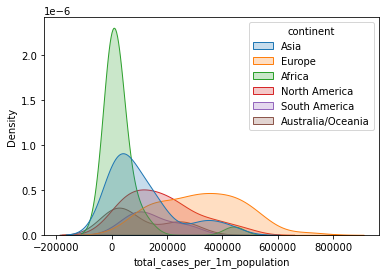

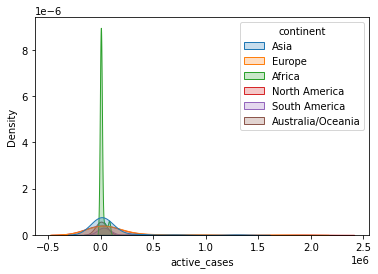

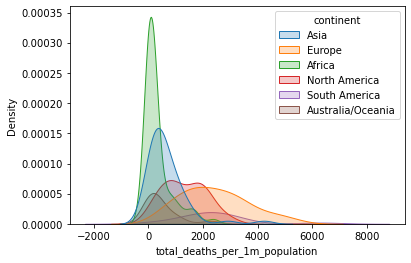

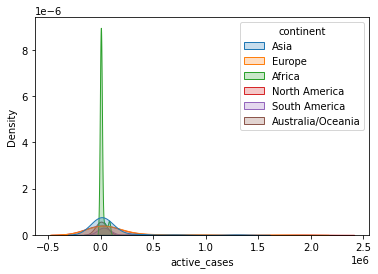

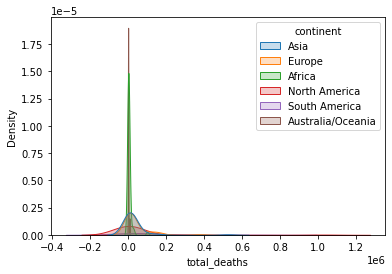

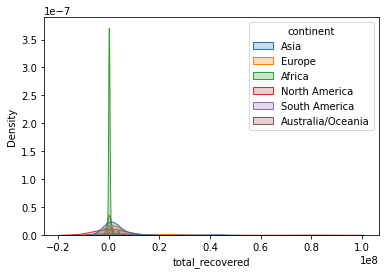

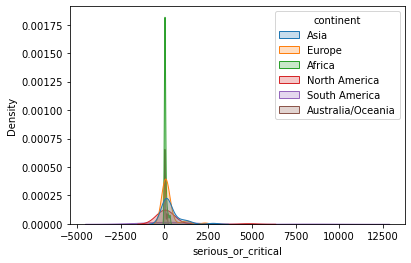

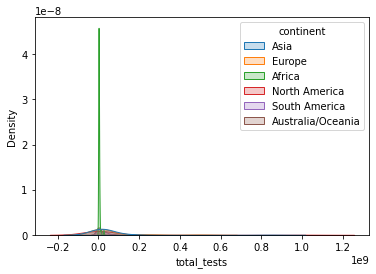

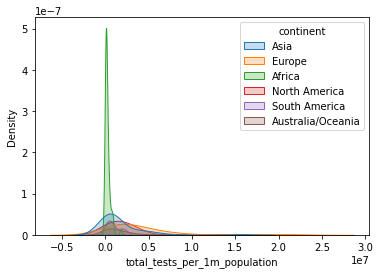

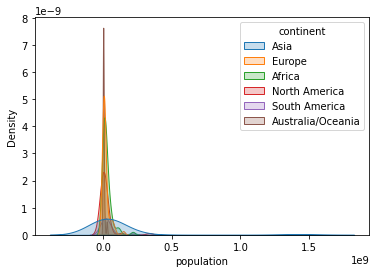

In [ ]:
#grouping few columns together to see the patterns
columns=['total_cases_per_1m_population','active_cases', 'total_deaths_per_1m_population','active_cases','total_deaths','total_recovered','serious_or_critical', 'total_tests', 'total_tests_per_1m_population','population']
for i in columns:
    plt.figure()
    sns.kdeplot(df[i], shade= True, hue= df['continent'])

Clearly, the patterns highlights Africa as leading in all catagories other than comparison of population with continents.

# 1. What is the total cases, deaths and recovered per continent?

Grouping of columns based on continent and sum of total_confirmed cases of all the countries in that continent are sorted in descending order, and is visualized using pie chart.
Grouping of columns based on continent and sum of total_death of all the countries in that continent are sorted in descending order. 
Similarly for the total recovered, we have taken total recovered per countries with total confirmed.


In [ ]:
#1.1 Grouping couuntries as per continent and finding out total confirmed initially.
Total_CasesbyContinent = df_summary.groupby("continent")["total_confirmed"].sum().sort_values(ascending = False)
Total_CasesbyContinent

continent
Europe               194330079
Asia                 149999659
North America         99625662
South America         57136485
Africa                12042400
Australia/Oceania      7942867
Name: total_confirmed, dtype: int64

We can see Europe has maximum total confirmed cases compared to other continents. 

In [ ]:
# Defining the colors for the graphs
colors = ['#ffaf7a', '#0892d0', '#F88379', '#D8BFD8', '#9FE2BF', '#722F37']

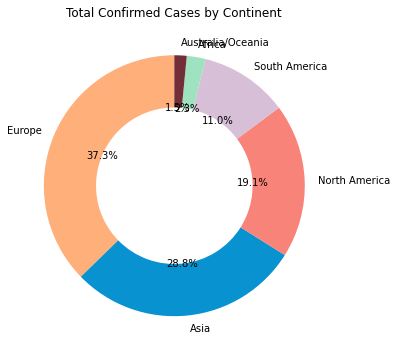

In [ ]:
# visualizing total cases by continent using pie and colors from above palette.
plt.figure(figsize=(8, 6))
# Create a pie chart with custom colors and width
plt.pie(Total_CasesbyContinent, labels=Total_CasesbyContinent.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'width': 0.4})
# Set the title
plt.title('Total Confirmed Cases by Continent')
# Display the pie chart
plt.show()


In [ ]:
#1.2 Total confirmed deaths
#Grouping of columns based on continent with total deaths and total confirmed
Total_deathsbyContinent = df_summary.groupby("continent")[["total_confirmed","total_deaths"]].sum().sort_values(["total_confirmed","total_deaths"],ascending= [False, False]).head()
Total_deathsbyContinent

,total_confirmed,total_deaths
continent,,
Europe,194330079,1830655
Asia,149999659,1427939
North America,99625662,1467234
South America,57136485,1296523
Africa,12042400,254319


In [ ]:
# #Create a wider figure
# plt.figure(figsize=(8, 6))
# # Create a pie chart with custom colors and width
# plt.pie(Total_deathbyContinent, labels= Total_deathbyContinent.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'width': 0.4})
# # Set the title
# plt.title('Total Deaths by Continent')
# # Display the pie chart
# plt.show()

In [ ]:
#1.3 Total recovered deaths
#Grouping of columns based on continent with total recovered and total confirmed

Total_recoveredbyContinent = df_summary.groupby("continent")[["total_confirmed","total_recovered"]].sum().sort_values(["total_confirmed","total_recovered"],ascending= [False, False]).head()
Total_recoveredbyContinent 


,total_confirmed,total_recovered
continent,,
Europe,194330079,170861871
Asia,149999659,126145273
North America,99625662,94818163
South America,57136485,51031313
Africa,12042400,10137200


# 2. Which 5 countries have the maximum death rate and recovery rate from the total confirmed cases based on their population?

To find out the countries with the maximum death rate and recovery rate, we have initially created a new dataframe name as "Country_values_confirmed_death" and Country_values_confirmed_recovered. 

The "death_percentage" and "recovered_percentage" has added new column to the dataframe by performing calculations on existing columns ("total_deaths/total_recovered" and "total_confirmed") and converted to the percentage value for each continent.



In [ ]:
Country_values_confirmed_death = df_summary.groupby("country")[["total_confirmed","total_deaths"]].sum().sort_values(["total_confirmed","total_deaths"],ascending= [False, False]).head()
Country_values_confirmed_death

,total_confirmed,total_deaths
country,,
USA,84209473,1026646
India,43121599,524214
Brazil,30682094,664920
France,29160802,147257
Germany,25780226,137919


In [ ]:
# calculating country based death percentage and Displaying the resulting DataFrame
Country_values_confirmed_death["death_percentage"] = (Country_values_confirmed_death["total_deaths"] / Country_values_confirmed_death["total_confirmed"]) * 100
Country_values_confirmed_death


,total_confirmed,total_deaths,death_percentage
country,,,
USA,84209473,1026646,1.219157
India,43121599,524214,1.215665
Brazil,30682094,664920,2.167127
France,29160802,147257,0.504983
Germany,25780226,137919,0.534980


In [ ]:
# calculating country based recovered percentage and Displaying the resulting DataFrame
Country_values_confirmed_recovered["recovered_percentage"] = (Country_values_confirmed_recovered["total_recovered"] / Country_values_confirmed_recovered["total_confirmed"]) * 100
Country_values_confirmed_recovered


,total_confirmed,total_recovered,recovered_percentage
continent,,,
Europe,194330079,170861871,87.923533
Asia,149999659,126145273,84.097040
North America,99625662,94818163,95.174437
South America,57136485,51031313,89.314757
Africa,12042400,10137200,84.179233


# 3. Which 20 countries have the highest new tests with regards to their population?

To perform this analysis, we have selected specific columns from each dataset, including "population" and "total_confirmed" from df_summary, and "daily_new_cases" and "date" from df_daily. The datasets are merged based on the common key, and the resulting combined DataFrame, combined_df, is printed.

In [ ]:
#Combining two datasets, using country as key column
common_key = "country"

#selecting population, country and total new tests from df_summary and df_daily
df1_columns = ["country", "population","total_confirmed" ]
df2_columns = ["country", "daily_new_cases", "date"]


In [ ]:
# Merge the datasets based on the common key
combined_df = pd.merge(df_summary[df1_columns], df_daily[df2_columns], on=common_key)

# Display the combined DataFrame
print(combined_df)

            country  population  total_confirmed  daily_new_cases       date
0       Afghanistan    40560636           179267                0  2020-2-15
1       Afghanistan    40560636           179267                0  2020-2-16
2       Afghanistan    40560636           179267                0  2020-2-17
3       Afghanistan    40560636           179267                0  2020-2-18
4       Afghanistan    40560636           179267                0  2020-2-19
...             ...         ...              ...              ...        ...
184782     Zimbabwe    15265849           249206              106  2022-5-10
184783     Zimbabwe    15265849           249206              136  2022-5-11
184784     Zimbabwe    15265849           249206              165  2022-5-12
184785     Zimbabwe    15265849           249206              188  2022-5-13
184786     Zimbabwe    15265849           249206               75  2022-5-14

[184787 rows x 5 columns]


The dataframe combined_df is then sorted by the "date" column in descending order, renamed "daily_new_cases" column to "Total_Daily_Cases" using the rename() function to print top twenty countries with the highest daily new cases.

In [ ]:
# Sort the DataFrame by daily_new_cases in descending order
combined_df = combined_df.sort_values("date", ascending=False)
combined_df= combined_df.rename(columns={"daily_new_cases": "Total_Daily_Cases"})

# Select the top 20 countries with the highest daily_new_cases
top_20_countries = combined_df.head(20)

# Display the top 20 countries
print(top_20_countries)

                       country  population  total_confirmed  \
184786                Zimbabwe    15265849           249206   
54143                  Eritrea     3637828             9745   
109903                 Moldova     4016504           516986   
179866               Venezuela    28285909           522921   
54963                  Estonia     1328196           573922   
174946                 Ukraine    43244553          5006460   
110723                  Monaco       39760            12004   
23779        Brunei Darussalam      445281           144659   
111543                Mongolia     3376601           469885   
112363              Montenegro      628214           236277   
113183              Montserrat        4998              747   
22959   British Virgin Islands       30606             6573   
114003                 Morocco    37725337          1165795   
114823              Mozambique    32885526           225493   
115643                 Myanmar    55089133           61

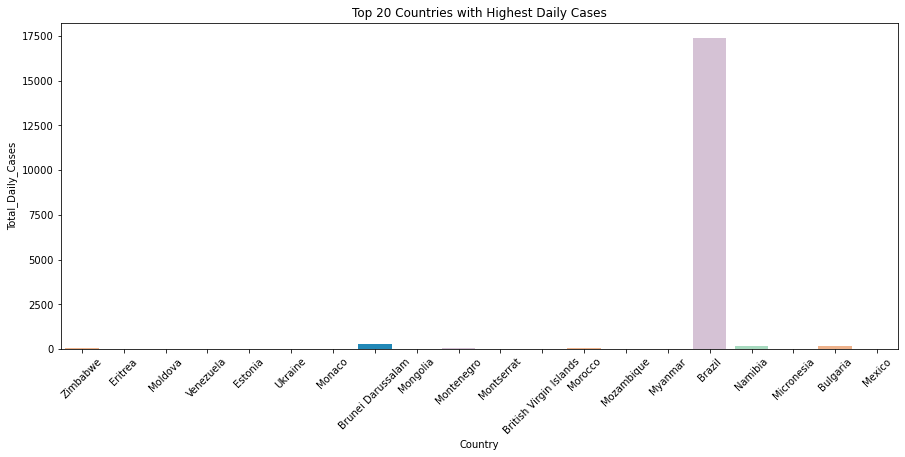

In [ ]:
# Set the figure size
plt.figure(figsize=(15, 6))

# Plot the bar chart using seaborn and set the colors
sns.barplot(x="country", y="Total_Daily_Cases", data=top_20_countries, palette=colors)

# Set the labels and title
plt.xlabel("Country")
plt.ylabel("Total_Daily_Cases")
plt.title("Top 20 Countries with Highest Daily Cases")

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Display the plot
plt.show()

The analysis shows that some countries have many more daily COVID-19 cases than others. The chart helps us quickly see which countries have the most cases and findings depends on different dates, giving us an idea of how the pandemic is spreading worldwide. It's important to remember that the choice of these top 20 countries depends on the dataset and may change with different data or time periods. 

Overall, the visualization gives us an overview of the countries currently dealing with a higher number of daily cases, recovery cases, death cases and confirmed cases.